In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [6]:
df = pd.read_csv('area.csv')

In [7]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Creating Linear regression model

In [8]:
reg = linear_model.LinearRegression()

### Model training

In [9]:
x = df[['area']]
y = df[['price']]
reg.fit(x,y)

LinearRegression()

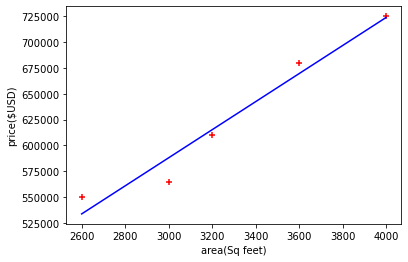

In [10]:
plt.xlabel('area(Sq feet)')
plt.ylabel('price($USD)')
plt.scatter(df['area'],df['price'],color = 'red',marker = '+')
plt.plot(x,reg.predict(x),color = 'blue')

### Predicting price using area feature

In [11]:
reg.predict([[3200]])[0][0]

615136.9863013698

In [12]:
d = pd.read_csv('prediction.csv')
d

,area,predicted_prices
0,2700,547243.150685
1,2600,533664.383562
2,2800,560821.917808
3,4300,764503.424658
4,3400,642294.520548
5,1000,316404.109589
6,5600,941027.397260


In [13]:
prices = d['area'].apply(lambda x:reg.predict([[x]])[0][0])
prices

0    547243.150685
1    533664.383562
2    560821.917808
3    764503.424658
4    642294.520548
5    316404.109589
6    941027.397260
Name: area, dtype: float64

In [14]:
d['predicted_prices'] = prices

In [84]:
d

,area,predicted_prices
0,2700,547243.150685
1,2600,533664.383562
2,2800,560821.917808
3,4300,764503.424658
4,3400,642294.520548
5,1000,316404.109589
6,5600,941027.397260


In [16]:
reg1 = linear_model.LinearRegression()
reg1.fit(d[['area']],d[['predicted_prices']])

LinearRegression()

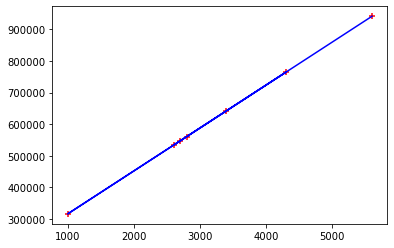

In [17]:
plt.scatter(d[['area']],d[['predicted_prices']],color = 'red',marker = '+')
plt.plot(d[['area']],reg1.predict(d[['area']]),color = 'blue')

### Coefficient of model

In [32]:
reg.coef_

array([[135.78767123]])

### Intercept of model

In [33]:
reg.intercept_

array([180616.43835616])

### y = mx+b

In [34]:
reg.coef_ * 3200 + reg.intercept_

array([[615136.98630137]])

In [35]:
#using this we get a dataframe
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [39]:
#using this we get series
df['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

### Saving file

In [86]:
d.to_csv('prediction.csv',index = False)